### 0. 安裝需要的函式庫 

In [15]:
import sys
!{sys.executable} -m pip install descartes
!{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install imageio
!{sys.executable} -m pip install pandas

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


### 1. 匯入函式庫

In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import descartes

### 2. 匯入地形資料

In [4]:
counties_shp = gpd.read_file('mapdata201907311006/COUNTY_MOI_1080726.shp',encoding='utf-8')
town_shp = gpd.read_file('mapdata201910221133/TOWN_MOI_1081007.shp',encoding='utf-8')

### 3. 繪製台灣地圖

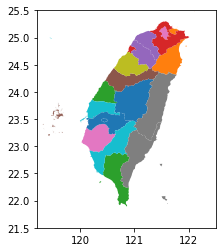

In [5]:
fig = counties_shp.plot(column='COUNTYNAME')
ax = fig.axis((119.2,122.5,21.5,25.5))

### 4. 繪製單一縣市

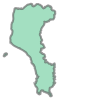

In [6]:
counties_shp.loc[5,'geometry']

### 5. 繪製台灣大圖

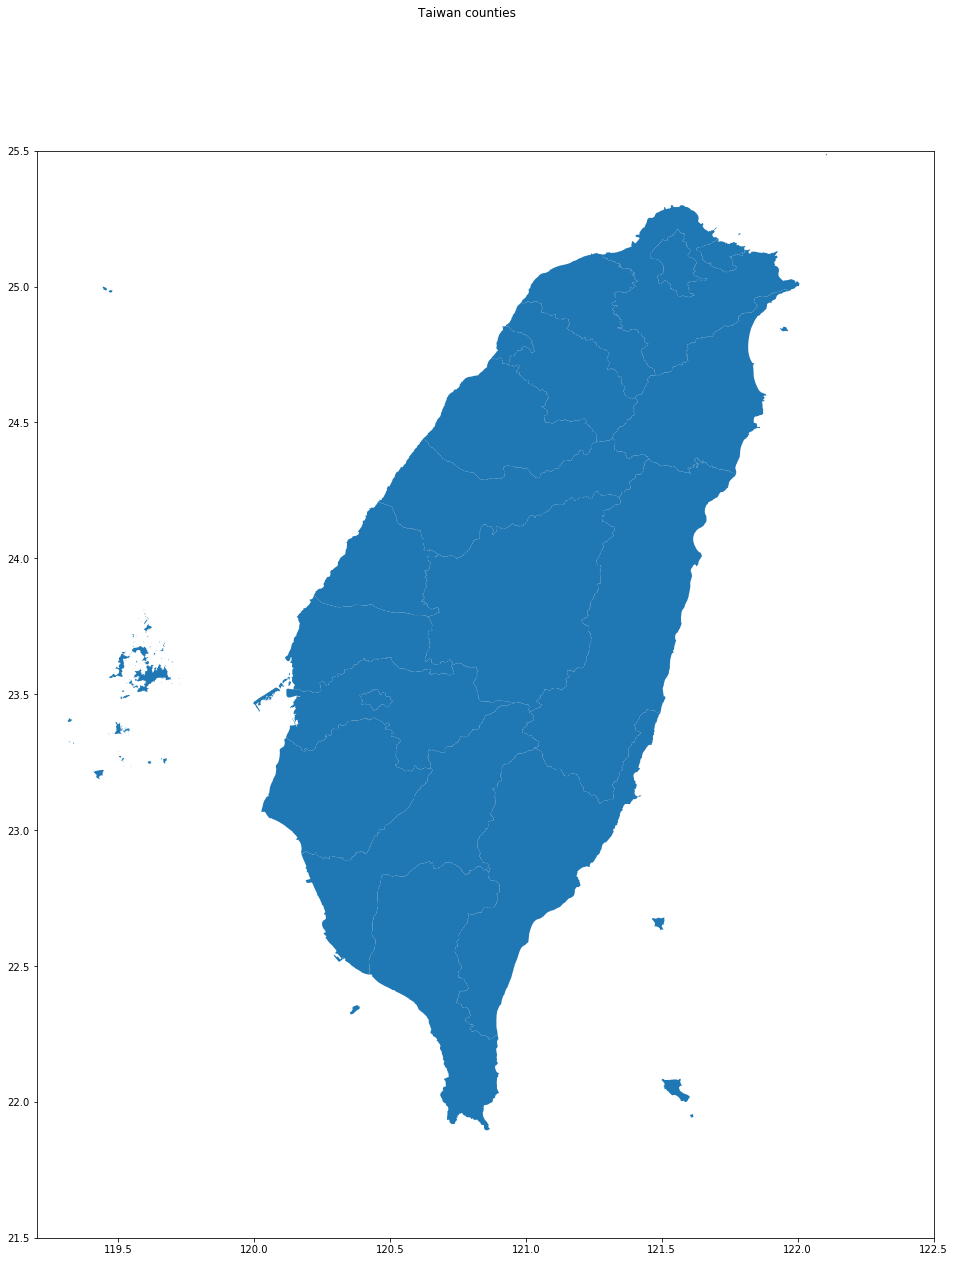

In [7]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax = counties_shp.plot(ax=ax)
ax.set_xlim((119.2,122.5))
ax.set_ylim((21.5,25.5))

fig.suptitle('Taiwan counties')
plt.show()

### 6. 刪除縣市、檢視縣市細節資訊

In [8]:
for index, row in counties_shp.iterrows():
    if row['COUNTYNAME'] == '連江縣' or row['COUNTYNAME'] == '金門縣' or row['COUNTYNAME'] == '澎湖縣'  :
        counties_shp.drop(index, inplace=True)
counties_shp

,COUNTYID,COUNTYCODE,COUNTYNAME,COUNTYENG,geometry
1,G,10002,宜蘭縣,Yilan County,(POLYGON ((121.9597084550001 24.84493697000005...
2,N,10007,彰化縣,Changhua County,"POLYGON ((120.4565526600001 24.20718620500008,..."
3,M,10008,南投縣,Nantou County,"POLYGON ((121.2708644380001 24.23660985400005,..."
4,P,10009,雲林縣,Yunlin County,"(POLYGON ((120.081077282 23.52412216400006, 12..."
5,T,10013,屏東縣,Pingtung County,"(POLYGON ((120.379645899 22.35598933400007, 12..."
7,C,10017,基隆市,Keelung City,"(POLYGON ((121.710150286 25.17604204900005, 12..."
8,O,10018,新竹市,Hsinchu City,"POLYGON ((120.9301072960001 24.85301711800008,..."
9,A,63000,臺北市,Taipei City,"POLYGON ((121.5709805050001 25.19716811600006,..."
10,F,65000,新北市,New Taipei City,"POLYGON ((121.537518241 25.30003166500006, 121..."
11,B,66000,臺中市,Taichung City,"POLYGON ((121.328342271 24.43303847500005, 121..."


### 7. 更詳盡的台灣地圖

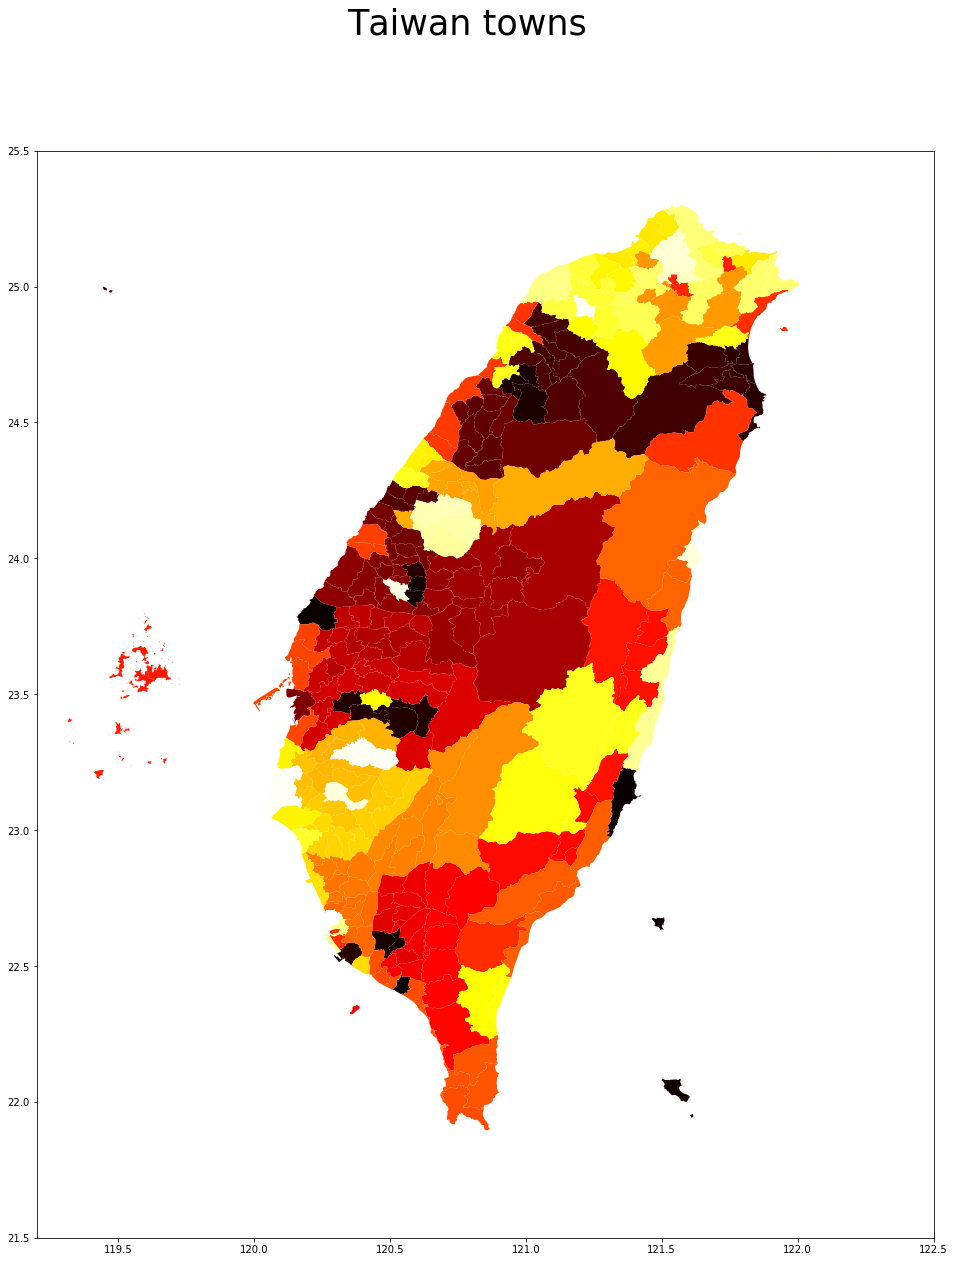

In [9]:
f, ax = plt.subplots(1, figsize=(20, 20))
ax = town_shp.plot(ax=ax,cmap='hot')
ax.set_xlim((119.2,122.5))
ax.set_ylim((21.5,25.5))


f.suptitle('Taiwan towns',fontsize=35)
plt.show()

### 8. 更詳盡的單一縣市地圖 

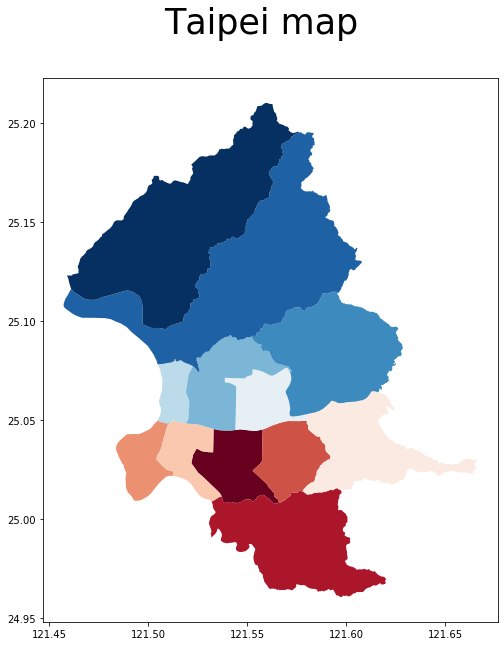

In [11]:
fig, ax = plt.subplots(1, figsize=(10, 10))
taichung_town_shp=town_shp[town_shp['COUNTYNAME']=='臺北市']
ax = taichung_town_shp.plot(ax=ax,cmap='RdBu')

fig.suptitle('Taipei map',fontsize=35)
plt.show()

### 9. 匯入函式庫

In [12]:
import os
import csv
import pandas as pd
import geopandas as gpd

### 10. 匯入新創公司資本額相關資料

In [14]:
path  = "company-test"
files=[]
data=[]
for r,d,f in os.walk(path):
    for file in f:
        files.append(os.path.join(r,file))
for f in files:
    print(f)
    year = f[-10:-6]
    month = f[-6:-4]  
    with open(f, 'r') as csvfile:
        r= csv.reader(csvfile, delimiter=',')
        for i,row in enumerate(r):
            if i == 1:
                #print(row)
                data.append({
                        'year':int(year),
                        'month': int(month),
                        'city': row[3][:3],
                        'capital': int(row[5])
                    })
#print(data)

company-test/201302.csv


### 11. 基礎資料操作

In [16]:
#使用pandas提供的框架
company_data = pd.DataFrame()
for f in files:
    if company_data.empty:
        company_data = pd.read_csv(f)
    else:
        company_data_new = pd.read_csv(f)
        frames = [company_data, company_data_new]
        company_data = pd.concat(frames)

company_data = company_data.drop(company_data.columns[[0,1,2,4,6]],axis=1)

#刪除資本額為零的公司
#for index, row in company_data.iterrows():
#    if row[1] == 0  :
#        company_data.drop(index, inplace=True)

#僅留下縣市名稱
company_data['公司所在地']=company_data['公司所在地'].apply(lambda t: t[:3])
company_data.head()

,公司所在地,資本額
0,臺南市,100000000
1,臺中市,0
2,桃園縣,0
3,臺中市,0
4,高雄市,1000000


### 12. 將縣市地圖資料及新創投資金額整合到同一個資料框架中

In [19]:
counties_shp = gpd.read_file('mapdata201907311006/COUNTY_MOI_1080726.shp',encoding='utf-8')
countynames = counties_shp['COUNTYNAME']

#各縣市該月份的總共資本額（單位為百萬元）
MoneyDic={'County':[],'Money':[]}
for c in countynames:
    count = 0.0 # in million
    for index, row in company_data.iterrows():
        if row[0] == c :
            count += (float)(row[1])/1000000.0
    #print(c,round(count,2))
    MoneyDic['County'].append(c)
    MoneyDic['Money'].append(round(count,2))
    '''for index, row in counties_shp.iterrows():
        if row['COUNTYNAME'] == c:
            counties_shp.loc[index]['Money']=round(count,2)
            #s = pd.Series([round(count,2)], index=[index])
            #counties_shp = counties_shp.assign(Money=s)'''
money_merge = pd.DataFrame(MoneyDic)
print(money_merge)

   County    Money
0     連江縣     0.00
1     宜蘭縣   188.05
2     彰化縣   200.20
3     南投縣    58.40
4     雲林縣    98.35
5     屏東縣    36.76
6     澎湖縣     3.00
7     基隆市    19.35
8     新竹市    93.54
9     臺北市  3796.66
10    新北市  1390.74
11    臺中市  1165.50
12    臺南市   452.98
13    桃園市     0.00
14    苗栗縣   100.26
15    新竹縣   379.65
16    嘉義市    11.44
17    嘉義縣     9.10
18    金門縣     7.50
19    高雄市   508.37
20    臺東縣     4.30
21    花蓮縣    35.40


In [20]:
New_counties_shp=counties_shp.merge(money_merge,left_on=('COUNTYNAME'),right_on=('County'))
New_counties_shp

,COUNTYID,COUNTYCODE,COUNTYNAME,COUNTYENG,geometry,County,Money
0,Z,09007,連江縣,Lienchiang County,(POLYGON ((119.9644519140001 25.94552317400007...,連江縣,0.00
1,G,10002,宜蘭縣,Yilan County,(POLYGON ((121.9597084550001 24.84493697000005...,宜蘭縣,188.05
2,N,10007,彰化縣,Changhua County,"POLYGON ((120.4565526600001 24.20718620500008,...",彰化縣,200.20
3,M,10008,南投縣,Nantou County,"POLYGON ((121.2708644380001 24.23660985400005,...",南投縣,58.40
4,P,10009,雲林縣,Yunlin County,"(POLYGON ((120.081077282 23.52412216400006, 12...",雲林縣,98.35
5,T,10013,屏東縣,Pingtung County,"(POLYGON ((120.379645899 22.35598933400007, 12...",屏東縣,36.76
6,X,10016,澎湖縣,Penghu County,(POLYGON ((119.4402533230001 23.22136844000005...,澎湖縣,3.00
7,C,10017,基隆市,Keelung City,"(POLYGON ((121.710150286 25.17604204900005, 12...",基隆市,19.35
8,O,10018,新竹市,Hsinchu City,"POLYGON ((120.9301072960001 24.85301711800008,...",新竹市,93.54
9,A,63000,臺北市,Taipei City,"POLYGON ((121.5709805050001 25.19716811600006,...",臺北市,3796.66


### 13. 利用合併資料製圖

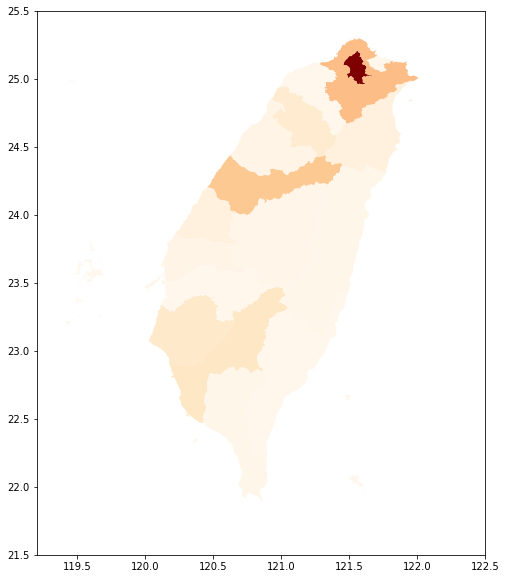

In [22]:
fig = New_counties_shp.plot(column='Money', cmap='OrRd',figsize=(10, 10))
ax = fig.axis((119.2,122.5,21.5,25.5))

### 14. 利用全部資料製作gif動圖

In [23]:
##匯入函式庫
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [24]:
##讀取地理資訊
counties_shp = gpd.read_file('mapdata201907311006/COUNTY_MOI_1080726.shp',encoding='utf-8')
countynames = counties_shp['COUNTYNAME']

In [25]:
##選用company資料中的所有資料
path  = "company"
files=[]
for r,d,f in os.walk(path):
    for file in f:
        files.append(os.path.join(r,file))

company_data = pd.DataFrame()

In [26]:
##整理資料，整理順序不影響後面動畫順序（需要一段時間）
list_of_years=[]
for f in files:
    year_month = f[-10:-4]
    list_of_years.append(year_month)
    company_data = pd.read_csv(f)
    company_data = company_data.drop(company_data.columns[[0,1,2,4]],axis=1)
    company_data['公司所在地']=company_data['公司所在地'].apply(lambda t: t[:3])
    MoneyDic={'County':[],year_month:[]}
    for c in countynames:
        count = 0.0 # in million
        for index, row in company_data.iterrows():
            if row[0] == c :
                count += (float)(row[1])/1000000.0
        MoneyDic['County'].append(c)
        MoneyDic[year_month].append(round(count,2))
    #print(MoneyDic)
    money_merge = pd.DataFrame(MoneyDic)
    counties_shp=counties_shp.merge(money_merge,left_on=('COUNTYNAME'),right_on=('County'))
    print(year_month)

201907
201906
201905


In [27]:
# GIF用圖儲存資料夾名稱
output_path = 'charts'

# 迴圈計數器
i = 0

# color bar數值上下限
vmin, vmax = 0, 10000
print(list_of_years)

['201907', '201906', '201905']


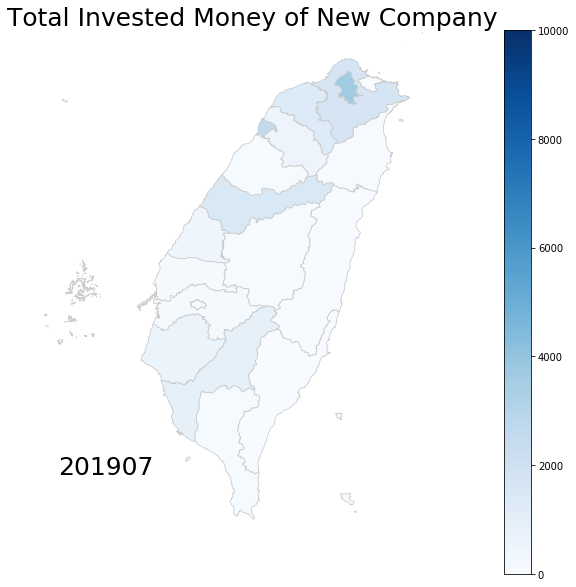

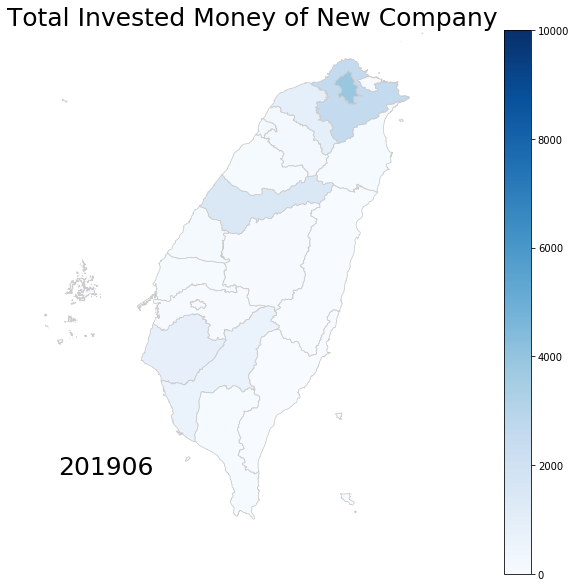

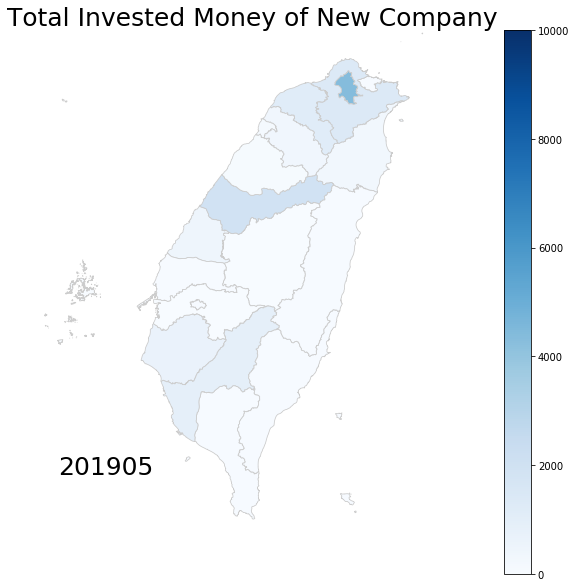

In [31]:
# 開始製圖
for year in list_of_years:
    fig = counties_shp.plot(column=year, cmap='Blues', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax, legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    ax = fig.axis((119.2,122.5,21.5,25.5))
    fig.axis('off')
    fig.set_title('Total Invested Money of New Company', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    fig.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=25)
    filepath = os.path.join(output_path, year+'_company.png')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

In [32]:
##用剛剛儲存的圖檔製作GIF
import imageio
path  = "charts"
imagefile_list = []
for r,d,f in os.walk(path):
    for file in f:
        imagefile_list.append(os.path.join(r,file))
sorted_imagefile_list=sorted(imagefile_list)
images = []
for filename in sorted_imagefile_list:
    #print(filename[-3:])
    if filename[-3:] == "png":
        images.append(imageio.imread(filename))
imageio.mimsave('company.gif', images)